# Milestone 2 - Training Transformer Models with GloVe embeddings

### Imports

In [1]:
%cd ..
# imports
from scripts_m2 import *


c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


c:\Users\001\OneDrive\Desktop\GUC\semester 10\nlp\NLP_PROJECT_111\QA Task milestone


c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torchtext\data\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torchtext\vocab\__init__.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TORCHTEXT STATUS /!\ 
Torchtext is deprecated and the last released version will be 0.18 (this one). You can silence this warning by calling the following at the beginnign of your scripts: `import torchtext; torchtext.disable_torchtext_deprecation_warning()`
  warnings.warn(torchtext._TORCHTEXT_DEPRECATION_MSG)
c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torchtext\utils.py:4: UserWarning: 
/!\ IMPORTANT WARNING ABOUT TOR

### 1. Get Dataloaders

In [2]:
train_dataloader, dev_dataloader, tokenizer = prepare_dataloaders_tokenizer()

Loading tokenizer from ./tokenizers/tokenizer.json...
Filtered dataset size: 19922 out of original 20000
Filtered dataset size: 1989 out of original 2000


### 2. Model Training

#### Question [PAD] [SEP] Context [PAD]

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = TransformerQAModel2(
    vocab_size=10000,
    embed_dim= 512,
    num_heads= 8,
    ff_dim= 512,
    num_q_layers = 3,
    num_cross_layers = 3,
    dropout = 0.1,
    max_len = 318,
    pad_idx = 1
)
model = model.to(device)

# Setup an optimizer (e.g., Adam)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

train_loss, val_loss = train_qa_context_model_boilerplate(
    model=model,
    train_dataloader=train_dataloader,
    val_dataloader=dev_dataloader,
    optimizer=optimizer,
    criterion=criterion,
    num_epochs=20,
    device=device,
    inputs = ["context","question", "attention_mask_context", "attention_mask_question"],
    evaluate_val_dataset=True,
)


c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\optim\lr_scheduler.py:28: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn("The verbose parameter is deprecated. Please use get_last_lr() "
Epoch 1/20:   0%|          | 0/623 [00:00<?, ?it/s]c:\Users\001\anaconda3\envs\nlp_env\Lib\site-packages\torch\nn\functional.py:5504: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:455.)
  attn_output = sca

Epoch 1 Loss: 7.9825


Evaluating: 100%|██████████| 623/623 [00:17<00:00, 34.86it/s]


Training Loss: 6.7346
Training Metrics: {'start_accuracy': 0.18276277482180503, 'start_precision': 0.18613876394343815, 'start_recall': 0.18276277482180503, 'start_f1_score': 0.17412230264348538, 'end_accuracy': 0.20479871498845498, 'end_precision': 0.21508403024850262, 'end_recall': 0.20479871498845498, 'end_f1_score': 0.19402977422562848, 'joint_exact_match': 0.09466920991868287, 'span_overlap_f1': 0.12165630278149003}


Evaluating: 100%|██████████| 63/63 [00:01<00:00, 34.37it/s]


Validation Loss: 8.4975
Validation Metrics: {'start_accuracy': 0.11362493715434892, 'start_precision': 0.12444251100721332, 'start_recall': 0.11362493715434892, 'start_f1_score': 0.10482065041437376, 'end_accuracy': 0.10960281548516843, 'end_precision': 0.12490755422264008, 'end_recall': 0.10960281548516843, 'end_f1_score': 0.0997945045107789, 'joint_exact_match': 0.05379587732528909, 'span_overlap_f1': 0.07825174486139358}
Validation loss improved to 8.4975. Saving model state.
--------------------------------------------------


Epoch 2/20: 100%|██████████| 623/623 [00:30<00:00, 20.18it/s, loss=6.34]


Epoch 2 Loss: 6.6717


Evaluating: 100%|██████████| 623/623 [00:17<00:00, 35.09it/s]


Training Loss: 6.0382
Training Metrics: {'start_accuracy': 0.20404577853629155, 'start_precision': 0.20360217894521726, 'start_recall': 0.20404577853629155, 'start_f1_score': 0.18959877896982089, 'end_accuracy': 0.21970685674129103, 'end_precision': 0.2273346258211045, 'end_recall': 0.21970685674129103, 'end_f1_score': 0.20751890003815152, 'joint_exact_match': 0.12383294849914667, 'span_overlap_f1': 0.15061651000710552}


Evaluating: 100%|██████████| 63/63 [00:01<00:00, 34.84it/s]


Validation Loss: 8.8258
Validation Metrics: {'start_accuracy': 0.11161387631975868, 'start_precision': 0.11731202179289632, 'start_recall': 0.11161387631975868, 'start_f1_score': 0.10003969993657054, 'end_accuracy': 0.11613876319758673, 'end_precision': 0.12632258033370247, 'end_recall': 0.11613876319758673, 'end_f1_score': 0.10680122571121882, 'joint_exact_match': 0.06385118149824032, 'span_overlap_f1': 0.08793874205168829}
Validation loss did not improve. No improvement for 1 epochs.
--------------------------------------------------


Epoch 3/20: 100%|██████████| 623/623 [00:30<00:00, 20.23it/s, loss=5.22]


Epoch 3 Loss: 6.3200


Evaluating: 100%|██████████| 623/623 [00:17<00:00, 35.19it/s]


Training Loss: 5.8453
Training Metrics: {'start_accuracy': 0.21539002108222066, 'start_precision': 0.21315338960576938, 'start_recall': 0.21539002108222066, 'start_f1_score': 0.19998714905928416, 'end_accuracy': 0.23772713582973598, 'end_precision': 0.2421602352195144, 'end_recall': 0.23772713582973598, 'end_f1_score': 0.22582395805075234, 'joint_exact_match': 0.14019676739283204, 'span_overlap_f1': 0.16784615882879877}


Evaluating: 100%|██████████| 63/63 [00:01<00:00, 34.05it/s]


Validation Loss: 10.5118
Validation Metrics: {'start_accuracy': 0.11412770236299648, 'start_precision': 0.10963875106927311, 'start_recall': 0.11412770236299648, 'start_f1_score': 0.10086078133849997, 'end_accuracy': 0.1282051282051282, 'end_precision': 0.12675671914321082, 'end_recall': 0.1282051282051282, 'end_f1_score': 0.11445975138425857, 'joint_exact_match': 0.06636500754147813, 'span_overlap_f1': 0.09320546969824707}
Validation loss did not improve. No improvement for 2 epochs.
--------------------------------------------------


Epoch 4/20: 100%|██████████| 623/623 [00:32<00:00, 19.01it/s, loss=6.79]


Epoch 4 Loss: 6.0952


Evaluating: 100%|██████████| 623/623 [00:19<00:00, 31.71it/s]


Training Loss: 5.6590
Training Metrics: {'start_accuracy': 0.21850215841782952, 'start_precision': 0.21696535127748084, 'start_recall': 0.21850215841782952, 'start_f1_score': 0.20784106672411826, 'end_accuracy': 0.2437004316835659, 'end_precision': 0.24845623136456302, 'end_recall': 0.2437004316835659, 'end_f1_score': 0.23483581907642925, 'joint_exact_match': 0.1314125087842586, 'span_overlap_f1': 0.15875645115590153}


Evaluating: 100%|██████████| 63/63 [00:02<00:00, 29.26it/s]


Validation Loss: 9.7168
Validation Metrics: {'start_accuracy': 0.11161387631975868, 'start_precision': 0.10646510142026955, 'start_recall': 0.11161387631975868, 'start_f1_score': 0.10081911543184142, 'end_accuracy': 0.12518853695324283, 'end_precision': 0.13787049511264574, 'end_recall': 0.12518853695324283, 'end_f1_score': 0.11744730056928336, 'joint_exact_match': 0.0628456510809452, 'span_overlap_f1': 0.08617629834194569}
Validation loss did not improve. No improvement for 3 epochs.
--------------------------------------------------


Epoch 5/20: 100%|██████████| 623/623 [00:31<00:00, 19.56it/s, loss=4.79]


Epoch 5 Loss: 5.5715


Evaluating: 100%|██████████| 623/623 [00:18<00:00, 32.94it/s]


Training Loss: 5.2216
Training Metrics: {'start_accuracy': 0.24595924104005623, 'start_precision': 0.24266792306105, 'start_recall': 0.24595924104005623, 'start_f1_score': 0.23270213574183973, 'end_accuracy': 0.2720610380483887, 'end_precision': 0.2711578359177734, 'end_recall': 0.2720610380483887, 'end_f1_score': 0.26225841244789627, 'joint_exact_match': 0.16253388214034736, 'span_overlap_f1': 0.19263977898768567}


Evaluating: 100%|██████████| 63/63 [00:01<00:00, 33.69it/s]


Validation Loss: 10.9681
Validation Metrics: {'start_accuracy': 0.11161387631975868, 'start_precision': 0.10708752115735458, 'start_recall': 0.11161387631975868, 'start_f1_score': 0.0979922389413296, 'end_accuracy': 0.13021618903971846, 'end_precision': 0.13664983515619492, 'end_recall': 0.13021618903971846, 'end_f1_score': 0.11956759231933001, 'joint_exact_match': 0.07038712921065862, 'span_overlap_f1': 0.0979220731936641}
Validation loss did not improve. No improvement for 4 epochs.
--------------------------------------------------


Epoch 6/20: 100%|██████████| 623/623 [00:31<00:00, 19.51it/s, loss=4.6] 


Epoch 6 Loss: 5.4262


Evaluating: 100%|██████████| 623/623 [00:19<00:00, 32.71it/s]


Training Loss: 5.0807
Training Metrics: {'start_accuracy': 0.25399056319646623, 'start_precision': 0.2502566292802019, 'start_recall': 0.25399056319646623, 'start_f1_score': 0.24260011597506584, 'end_accuracy': 0.28235116956128903, 'end_precision': 0.28179358372437197, 'end_recall': 0.28235116956128903, 'end_f1_score': 0.2740689414801526, 'joint_exact_match': 0.1657966067663889, 'span_overlap_f1': 0.19492510904423122}


Evaluating: 100%|██████████| 63/63 [00:01<00:00, 31.74it/s]

Validation Loss: 11.0085
Validation Metrics: {'start_accuracy': 0.11664152840623429, 'start_precision': 0.11843908365732293, 'start_recall': 0.11664152840623429, 'start_f1_score': 0.10684639118850403, 'end_accuracy': 0.13122171945701358, 'end_precision': 0.13867289756153708, 'end_recall': 0.13122171945701358, 'end_f1_score': 0.1225025930515359, 'joint_exact_match': 0.06887883358471594, 'span_overlap_f1': 0.09453027184724076}
Validation loss did not improve. No improvement for 5 epochs.
Early stopping triggered.
Loaded the best model state.


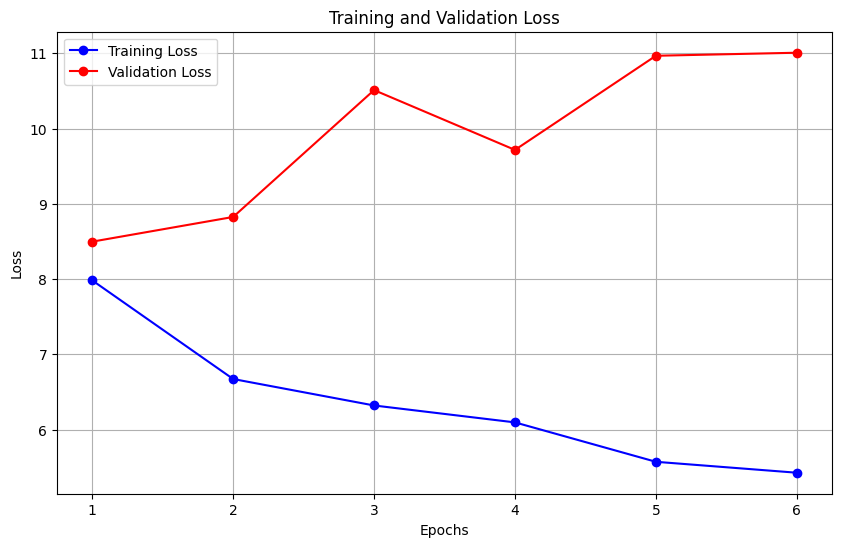

In [4]:
# Plotting the training and validation loss
plot_loss_curves(train_loss, val_loss)

#### Save Model

In [5]:
model_path = "models/qa_context_model_transformer_cross_attn.pkl"

In [6]:
save_model(model, model_path)

Model saved to models/qa_context_model_transformer_cross_attn.pkl


In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = load_model(model_path=model_path)

Model loaded from models/qa_context_model_transformer_cross_attn.pkl


#### Evaluation

In [8]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss()
device = 'cuda' if torch.cuda.is_available() else 'cpu'
evaluate_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, criterion=criterion, device=device, inputs = ["context","question", "attention_mask_context", "attention_mask_question"])

Evaluating: 100%|██████████| 623/623 [00:20<00:00, 30.39it/s]

Validation Loss: 6.7354
Validation Metrics: {'start_accuracy': 0.18276277482180503, 'start_precision': 0.18613876394343815, 'start_recall': 0.18276277482180503, 'start_f1_score': 0.17412230264348538, 'end_accuracy': 0.20479871498845498, 'end_precision': 0.21508403024850262, 'end_recall': 0.20479871498845498, 'end_f1_score': 0.19402977422562848, 'joint_exact_match': 0.09466920991868287, 'span_overlap_f1': 0.12165630278149003}


(6.735394742668728,
 {'start_accuracy': 0.18276277482180503,
  'start_precision': 0.18613876394343815,
  'start_recall': 0.18276277482180503,
  'start_f1_score': 0.17412230264348538,
  'end_accuracy': 0.20479871498845498,
  'end_precision': 0.21508403024850262,
  'end_recall': 0.20479871498845498,
  'end_f1_score': 0.19402977422562848,
  'joint_exact_match': 0.09466920991868287,
  'span_overlap_f1': 0.12165630278149003})

In [9]:
# evaluate the model on the dev set
criterion = nn.CrossEntropyLoss()
evaluate_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, criterion=criterion, device=device, inputs = ["context","question", "attention_mask_context", "attention_mask_question"])

Evaluating: 100%|██████████| 63/63 [00:02<00:00, 29.08it/s]

Validation Loss: 8.4975
Validation Metrics: {'start_accuracy': 0.11362493715434892, 'start_precision': 0.12444251100721332, 'start_recall': 0.11362493715434892, 'start_f1_score': 0.10482065041437376, 'end_accuracy': 0.10960281548516843, 'end_precision': 0.12490755422264008, 'end_recall': 0.10960281548516843, 'end_f1_score': 0.0997945045107789, 'joint_exact_match': 0.05379587732528909, 'span_overlap_f1': 0.07825174486139358}


(8.49748244361272,
 {'start_accuracy': 0.11362493715434892,
  'start_precision': 0.12444251100721332,
  'start_recall': 0.11362493715434892,
  'start_f1_score': 0.10482065041437376,
  'end_accuracy': 0.10960281548516843,
  'end_precision': 0.12490755422264008,
  'end_recall': 0.10960281548516843,
  'end_f1_score': 0.0997945045107789,
  'joint_exact_match': 0.05379587732528909,
  'span_overlap_f1': 0.07825174486139358})

##### Evaluate predictions on test set

In [10]:
preds, true_labels, contexts, questions = predict_qa_context_model_boilerplate(model=model, dataloader=dev_dataloader, tokenizer=tokenizer, device=device, inputs = ["context","question", "attention_mask_context", "attention_mask_question"])

Predicting: 100%|██████████| 63/63 [00:02<00:00, 22.75it/s]


In [11]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {questions[i]}")
    print(f"Context: {contexts[i]}")
    print(f"Predicted Answer: {preds[i]}")
    print(f"True Answer: {true_labels[i]}")
    print("-" * 50)

Question: how many khitan tumens were there ?
Context: many han chinese and khitan defected to the mongols to fight against the jin . two han chinese leaders , shi tianze , liu heima ( 劉, liu ni ), and the khitan xiao zhala ( ) defected and commanded the 3 tumens in the mongol army . liu heima and shi tianze served ogödei khan . liu heima and shi tianxiang led armies against western xia for the mongols . there were 4 han tumens and 3 khitan tumens , with each tumen consisting of 10 , 000 troops . the three khitan generals shimobeidier ( 石), tabuyir ( 不) and xiaozhacizhizizhongxi ( 之子重喜 ) commanded the three khitan tumens and the four han generals zhang rou , yan shi , shi tianze , and liu heima commanded the four han tumens under ogödei khan .
Predicted Answer: 
True Answer: 3
--------------------------------------------------
Question: what is the atomic number of the element oxygen ?
Context: oxygen is a chemical element with symbol o and atomic number 8 . it is a member of the chalc

##### Evaluate predictions on training set

In [12]:
train_preds, train_true_labels, train_contexts, train_questions = predict_qa_context_model_boilerplate(model=model, dataloader=train_dataloader, tokenizer=tokenizer, device=device, inputs = ["context","question", "attention_mask_context", "attention_mask_question"])

Predicting: 100%|██████████| 623/623 [00:26<00:00, 23.48it/s]


In [13]:
# Compare the predictions with the actual answers
for i in range(100):
    print(f"Question: {train_questions[i]}")
    print(f"Context: {train_contexts[i]}")
    print(f"Predicted Answer: {train_preds[i]}")
    print(f"True Answer: {train_true_labels[i]}")
    print("-" * 50)

Question: christians were said to be the scapegoat of who ?
Context: the earliest occurrences of the term in non - christian literature include josephus , referring to " the tribe of christians , so named from him ;" pliny the younger in correspondence with trajan ; and tacitus , writing near the end of the 1st century . in the annals he relates that " by vulgar appellation [ they were ] commonly called christians " and identifies christians as nero ' s scapegoats for the great fire of rome .
Predicted Answer: 
True Answer: nero
--------------------------------------------------
Question: in denmark , wind power accounts for what percentage of electricity generated ?
Context: some of the second - generation renewables , such as wind power , have high potential and have already realised relatively low production costs . global wind power installations increased by 35 , 800 mw in 2010 , bringing total installed capacity up to 194 , 400 mw , a 22 . 5 % increase on the 158 , 700 mw install